### LOADING REQUIRED LIABRARIES

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt


plt.style.use('ggplot')
%matplotlib inline

### LOADING AND CREATING THE DATAFRAME

In [2]:
df = pd.read_csv('Data/agaricus-lepiota.data')
df.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [3]:
#checking the length of our DataFrame
df_len = len(df)
df_len

8123

# EXAMINING THE DATAFRAME

In [4]:
# rename columns
df.rename(columns={'p':'classes', 'x':'cap_shape', 's':'cap_surface', 
                  'n':'cap_color', 't':'bruises', 'p.1':'odor', 'f':'gill_attachment', 
                  'c':'gill_spacing', 'n.1':'gill_size', 'k':'gill_color', 'e':'stalk_shape', 
                  'e.1':'stalk_root', 's.1':'stalk_surface_above_ring', 's.2':'stalk_surface_below_ring', 
                  'w':'stalk_color_above_ring', 'w.1':'stalk_color_below_ring', 'p.2':'veil_type', 
                  'w.2':'veil_color', 'o':'ring_number', 'p.3':'ring_type', 'k.1':'spore_print_color', 
                  's.3':'population', 'u':'habitat'}, inplace=True)

In [5]:
# Replace the '?'s with NaN
df = df.replace('?', np.nan)

In [6]:
# Checking for missing values
df.isnull().sum()

classes                        0
cap_shape                      0
cap_surface                    0
cap_color                      0
bruises                        0
odor                           0
gill_attachment                0
gill_spacing                   0
gill_size                      0
gill_color                     0
stalk_shape                    0
stalk_root                  2480
stalk_surface_above_ring       0
stalk_surface_below_ring       0
stalk_color_above_ring         0
stalk_color_below_ring         0
veil_type                      0
veil_color                     0
ring_number                    0
ring_type                      0
spore_print_color              0
population                     0
habitat                        0
dtype: int64

In [7]:
# Replacing values in columns

df['classes'] = df['classes'].replace({'p':'poisonous', 'e':'edible'})
df['cap_shape'] = df['cap_shape'].replace(to_replace=['b','c','x','f','k','s'], value = ['bell','conical','convex','flat','knobbed','sunken'])
df['cap_surface'] = df['cap_surface'].replace(to_replace=['f','g','y','s'], value = ['fibrous','grooves','scaly','smooth'])
df['cap_color'] = df['cap_color'].replace(to_replace =['n','b','c','g','r','p','u','e','w','y'], value=['brown','buff','cinnamon','gray','green','pink','purple','red','white','yellow'])
df['bruises'] = df['bruises'].replace(to_replace= ['t','f'], value = ['bruises','no'])
df['odor'] = df['odor'].replace(to_replace = ['a','l','c','y','f','m','n','p','s'], value = ['almond','anise','creosote','fishy','foul','musty','none','pungent','spicy'])
df['gill_attachment'] = df['gill_attachment'].replace(to_replace = ['a','d','f','n'], value =['attached','descending','free','notched'])
df['gill_spacing'] = df['gill_spacing'].replace(to_replace = ['c','w','d'], value = ['close','crowded','distant'])
df['gill_size'] = df['gill_size'].replace(to_replace = ['b','n'], value = ['broad','narrow'])
df['gill_color'] = df['gill_color'].replace(to_replace = ['k','n','b','h','g','r','o','p','u','e','w','y'], value = ['black','brown','buff','chocolate','gray','green','orange','pink','purple','red','white','yellow'])
df['stalk_shape'] = df['stalk_shape'].replace(to_replace =['e','t'], value = ['enlarging','tapering'])
df['stalk_root'] = df['stalk_root'].replace(to_replace =['b','c','u','e','z','r','?'], value = ['bulbous',' club','cup','equal','rhizomorphs','rooted',np.nan])
df['stalk_surface_above_ring'] = df['stalk_surface_above_ring'].replace(to_replace =['f','y','k','s'], value = ['fibrous','scaly','silky','smooth'])
df['stalk_surface_below_ring'] = df['stalk_surface_below_ring'].replace(to_replace =['f','y','k','s'], value = ['fibrous','scaly','silky','smooth'])
df['stalk_color_above_ring'] = df['stalk_color_above_ring'].replace(to_replace =['n','b','c','g','o','p','e','w','y'], value = ['brown','buff','cinnamon','gray','orange','pink','red','white','yellow'])
df['stalk_color_below_ring'] = df['stalk_color_below_ring'].replace(to_replace =['n','b','c','g','o','p','e','w','y'], value = ['brown','buff','cinnamon','gray','orange','pink','red','white','yellow'])
df['veil_type'] = df['veil_type'].replace(to_replace =['p','u'], value =['partial','universal'])
df['veil_color'] = df['veil_color'].replace(to_replace =['n','o','w','y'], value =['brown','orange','white','yellow'])
df['ring_number'] = df['ring_number'].replace(to_replace =['n','o','t'], value =['none','one','two'])
df['ring_type'] = df['ring_type'].replace(to_replace =['c','e','f','l','n','p','s','z'], value = ['cobwebby','evanescent','flaring','large','none','pendant','sheathing','zone'])
df['spore_print_color'] = df['spore_print_color'].replace(to_replace =['k','n','b','h','r','o','u','w','y'], value = ['black','brown','buff','chocolate','green','orange','purple','white','yellow'])
df['population'] = df['population'].replace(to_replace =['a','c','n','s','v','y'], value = ['abundant','clustered','numerous','scattered','several','solitary'])
df['habitat'] = df['habitat'].replace(to_replace =['g','l','m','p','u','w','d'], value = ['grasses', 'leaves', 'meadows', 'paths', 'urban', 'waste', 'woods'])

In [8]:
# Iterate over each column of df
for col in df.columns:
    # Check if the column is of object type
    if df[col].dtypes == 'object':
        # Impute with the most frequent value
        df = df.fillna(df[col].value_counts().index[0])
        
print(df.isnull().sum())

classes                     0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
dtype: int64


In [9]:
# Counting the number of edible and poisonous mashrooms
df['classes'].value_counts()

edible       4208
poisonous    3915
Name: classes, dtype: int64

- We have 4208 edible mashrooms and 3915 poisonous mashrooms

In [10]:
# GETTING BASIC DESCRIPTION OF EDIBLE AND POISONOUS MASHROOMS

In [11]:
df.min()

classes                         edible
cap_shape                         bell
cap_surface                    fibrous
cap_color                        brown
bruises                        bruises
odor                            almond
gill_attachment               attached
gill_spacing                     close
gill_size                        broad
gill_color                       black
stalk_shape                  enlarging
stalk_root                        club
stalk_surface_above_ring       fibrous
stalk_surface_below_ring       fibrous
stalk_color_above_ring           brown
stalk_color_below_ring           brown
veil_type                      partial
veil_color                       brown
ring_number                       none
ring_type                   evanescent
spore_print_color                black
population                    abundant
habitat                        grasses
dtype: object

 - An edible mashroom has brown cap colour, and has a bell cap_shape and grows on grasses

In [12]:
df.max()

classes                     poisonous
cap_shape                      sunken
cap_surface                    smooth
cap_color                      yellow
bruises                            no
odor                            spicy
gill_attachment                  free
gill_spacing                  crowded
gill_size                      narrow
gill_color                     yellow
stalk_shape                  tapering
stalk_root                     rooted
stalk_surface_above_ring       smooth
stalk_surface_below_ring       smooth
stalk_color_above_ring         yellow
stalk_color_below_ring         yellow
veil_type                     partial
veil_color                     yellow
ring_number                       two
ring_type                     pendant
spore_print_color              yellow
population                   solitary
habitat                         woods
dtype: object

- An poisonous mashroom has cap_color yelow, and has a sunken cap_shape and grows on woods

In [13]:
df.describe()

,classes,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,...,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,edible,convex,scaly,brown,no,none,free,close,broad,buff,...,smooth,white,white,partial,white,one,pendant,white,several,woods
freq,4208,3655,3244,2283,4748,3528,7913,6811,5612,1728,...,4935,4463,4383,8123,7923,7487,3967,2388,4040,3148


# SPLITING THE DATA  INTO TRAINING AND TEST DATA SETS

In [14]:
#split dataset in features and target variable
X = df[df.columns[1:]]
y = df.classes

# encode categorical features and replace target values to binary values
X_dummy = pd.get_dummies(X)
y_dummy = df['classes'].replace(['edible', 'poisonous'], [1, 0])

# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y_dummy, test_size=0.20, stratify=y_dummy, random_state=42)

print(y_train.shape, X_train.shape)
print(y_test.shape, X_test.shape)

(6498,) (6498, 117)
(1625,) (1625, 117)


# PREPROCESSING DATA

In [15]:
# instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler()
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

# BUILDING DESICION TREE MODEL

In [16]:

# Instantiate a DecisionTree classifier with default parameter values
decision_tree = DecisionTreeClassifier()

# Fit decision_tree to the train set
decision_tree = decision_tree.fit(rescaledX_train, y_train)

#Predictions
y_pred = decision_tree.predict(rescaledX_test)
y_pred_train = decision_tree.predict(rescaledX_train)

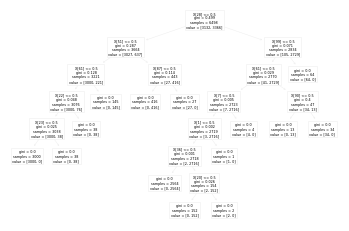

In [17]:
from sklearn import tree
tree.plot_tree(decision_tree );

In [18]:
import graphviz 
dot_data = tree.export_graphviz(decision_tree , out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("agaricus_lepiota")

'agaricus_lepiota.pdf'

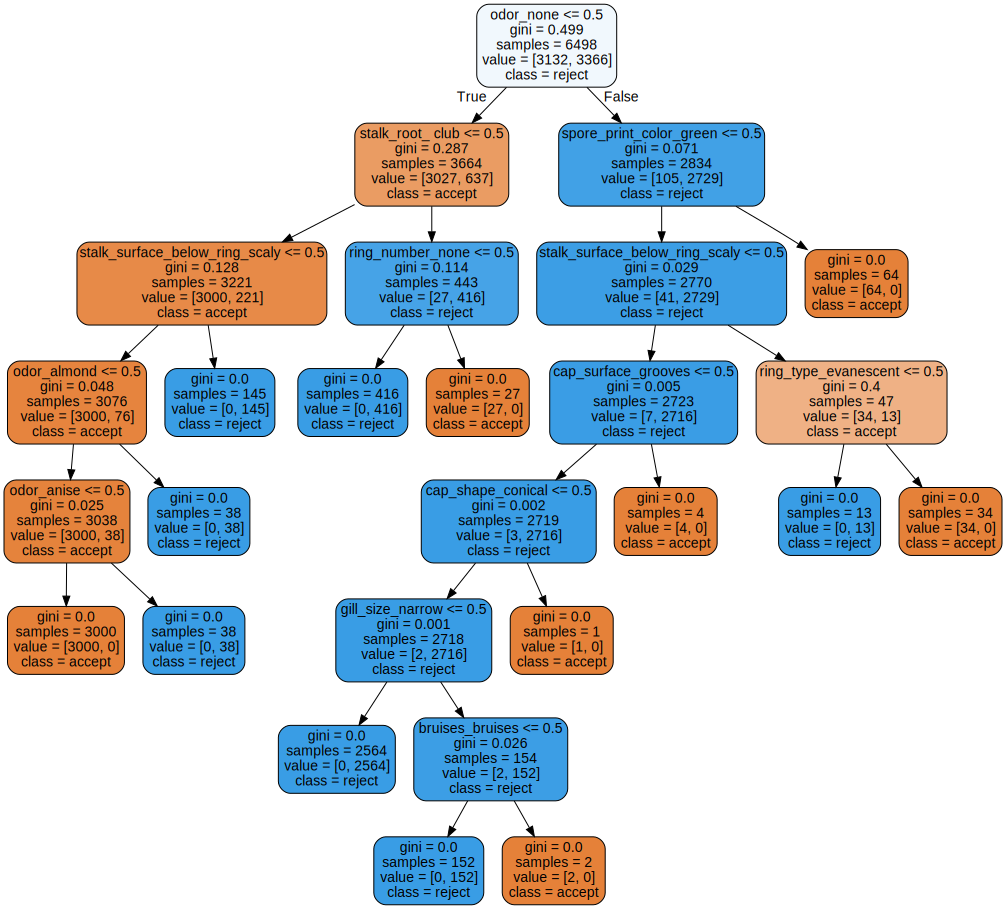

In [19]:
dot_data = tree.export_graphviz(decision_tree, out_file = None, feature_names = X_train.columns, 
                                class_names = ["accept", "reject"], filled = True, rounded = True)  
graph = graphviz.Source(dot_data)  
graph

# CLASSIFICATION REPORT

In [20]:
print('Decision Tree classification report:')
print('Test set', classification_report(y_test, y_pred))            
print('\n')
print('Train set', classification_report(y_train, y_pred_train))

Decision Tree classification report:
Test set               precision    recall  f1-score   support

           0       1.00      1.00      1.00       783
           1       1.00      1.00      1.00       842

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Train set               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3132
           1       1.00      1.00      1.00      3366

    accuracy                           1.00      6498
   macro avg       1.00      1.00      1.00      6498
weighted avg       1.00      1.00      1.00      6498



- This model is 100 percent accurate
- This is because we are using a part of training data for testing. At the time of training, decision tree gained the knowledge about that data, and now if we give it same data to predict it will give us exactly the same value.  

# CONFUSION MATRIX

In [21]:
print('Test set\n', confusion_matrix(y_test, y_pred))
print('\n')
print('Train set\n',confusion_matrix(y_train, y_pred_train))

Test set
 [[783   0]
 [  0 842]]


Train set
 [[3132    0]
 [   0 3366]]


- For the train set we have 783 true positives and 0 false positives
- We also have 0 true negatives and 842 false negative for the train set
- For the test set we have 3132 true positive and 0 false positive
- We also have 0 true negatives and 3366 false negative for the test set

# RECEIVER OPERATING CHARACTERISTIC (ROC) CURVE

In [22]:
logreg_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, threshold_log = roc_curve(y_test, y_pred)

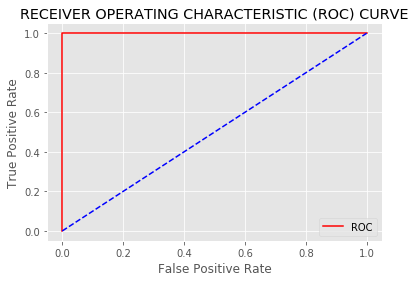

In [23]:
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RECEIVER OPERATING CHARACTERISTIC (ROC) CURVE')
plt.legend()
plt.show()

- The ROC Curve  supports the 100 percent accuracy of the model.